In [66]:
library("readxl")
library(dplyr)
library(ggplot2)
library(xts)

In [70]:
shopeeflow <- read_excel("/Users/daphne/Desktop/Business_Analytics/FinalProject/資料集_ver2/蝦皮流量.xlsx")  #class: data.frame
shopeeflow <- xts(x=shopeeflow[,-1], order.by= as.POSIXct(shopeeflow$日期))
shopeeflow <- data.frame(shopeeflow)
#shopeeflow[,-c(1)]
shopeeflow

,總銷售額_TWD,訂單總數,平均訂單金額,商品頁面瀏覽數,訪客數,訂單轉換率_可出貨訂單,買家數,新買家數,舊買家數,潛在買家數,回購率
2020-01-01,0,0,0.00,286,161,0.0000,0,0,0,1,0.0000
2020-01-02,0,0,0.00,233,128,0.0000,0,0,0,2,0.0000
2020-01-03,0,0,0.00,225,123,0.0000,0,0,0,0,0.0000
2020-01-04,0,0,0.00,175,94,0.0000,0,0,0,0,0.0000
2020-01-05,0,0,0.00,249,138,0.0000,0,0,0,0,0.0000
2020-01-06,0,0,0.00,299,161,0.0000,0,0,0,5,0.0000
2020-01-07,0,0,0.00,699,203,0.0000,0,0,0,7,0.0000
2020-01-08,6037,3,2012.33,1378,272,0.0110,3,2,1,34,0.0000
2020-01-09,1875,1,1875.00,1026,265,0.0038,1,0,1,33,0.0000
2020-01-10,6618,4,1654.50,858,226,0.0133,3,1,2,15,0.3333


In [74]:
str(shopeeflow)

'data.frame':	274 obs. of  11 variables:
 $ 總銷售額_TWD         : num  0 0 0 0 0 ...
 $ 訂單總數             : num  0 0 0 0 0 0 0 3 1 4 ...
 $ 平均訂單金額         : num  0 0 0 0 0 ...
 $ 商品頁面瀏覽數       : num  286 233 225 175 249 ...
 $ 訪客數               : num  161 128 123 94 138 161 203 272 265 226 ...
 $ 訂單轉換率_可出貨訂單: num  0 0 0 0 0 0 0 0.011 0.0038 0.0133 ...
 $ 買家數               : num  0 0 0 0 0 0 0 3 1 3 ...
 $ 新買家數             : num  0 0 0 0 0 0 0 2 0 1 ...
 $ 舊買家數             : num  0 0 0 0 0 0 0 1 1 2 ...
 $ 潛在買家數           : num  1 2 0 0 0 5 7 34 33 15 ...
 $ 回購率               : num  0 0 0 0 0 ...


In [76]:
'#shopeeflow[] <- lapply(shopeeflow, function(x) as.numeric(as.character(x)))
shopeeflow$總銷售額_TWD <- as.numeric(as.character(shopeeflow$總銷售額_TWD))
shopeeflow$回購率 <- as.numeric(sub("%","",shopeeflow$回購率))/100

#colnames(shopeeflow)
#row.names(shopeeflow)
dim(shopeeflow)'

[1] "#shopeeflow[] <- lapply(shopeeflow, function(x) as.numeric(as.character(x)))\nshopeeflow$總銷售額_TWD <- as.numeric(as.character(shopeeflow$總銷售額_TWD))\nshopeeflow$回購率 <- as.numeric(sub(\"%\",\"\",shopeeflow$回購率))/100\n\n#colnames(shopeeflow)\n#row.names(shopeeflow)\ndim(shopeeflow)"

In [72]:
dim(shopeeflow)

[1] 274  11

Warning message in axis(side = side, at = at, labels = labels, ...):
“font family 'Songti TC' not found in PostScript font database”Warning message in axis(side = side, at = at, labels = labels, ...):
“font family 'Songti TC' not found in PostScript font database”Warning message in axis(side = side, at = at, labels = labels, ...):
“font family 'Songti TC' not found in PostScript font database”Warning message in axis(side = side, at = at, labels = labels, ...):
“font family 'Songti TC' not found in PostScript font database”Warning message in axis(side = side, at = at, labels = labels, ...):
“font family 'Songti TC' not found in PostScript font database”Warning message in axis(side = side, at = at, labels = labels, ...):
“font family 'Songti TC' not found in PostScript font database”Warning message in axis(side = side, at = at, labels = labels, ...):
“font family 'Songti TC' not found in PostScript font database”Warning message in axis(side = side, at = at, labels = labels, ...):
“font f

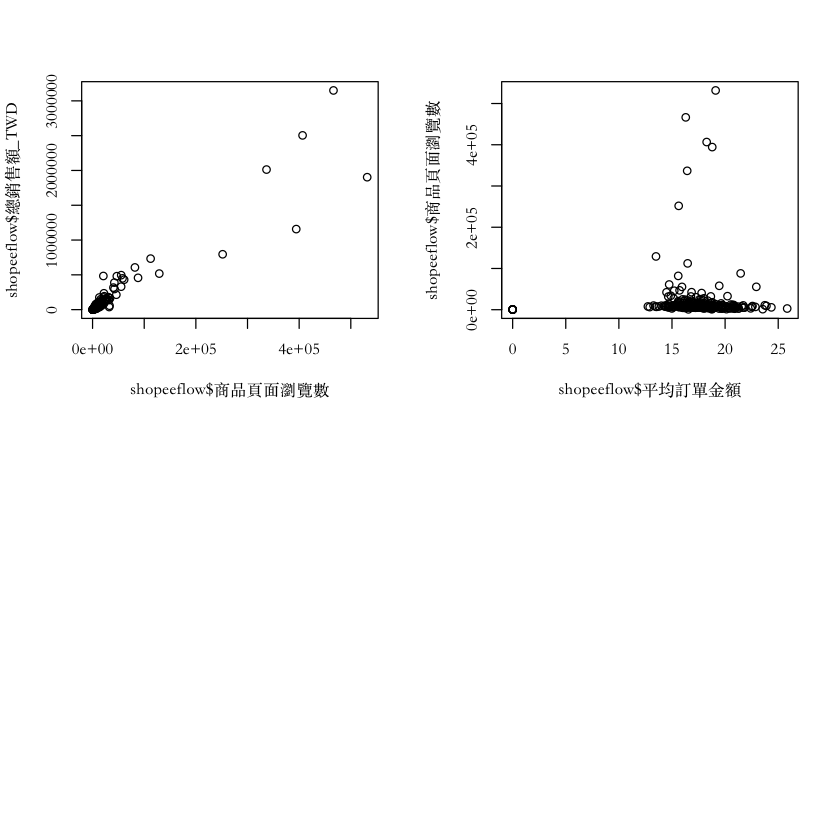

In [54]:
par(family="Songti TC")
par(mfrow = c(2, 2))
plot(shopeeflow$總銷售額_TWD ~ shopeeflow$商品頁面瀏覽數)
plot(shopeeflow$商品頁面瀏覽數 ~ shopeeflow$平均訂單金額)

Warning message in strwidth(labels, "user"):
“conversion failure on '總銷售額_TWD' in 'mbcsToSbcs': dot substituted for <e7>”Warning message in strwidth(labels, "user"):
“conversion failure on '總銷售額_TWD' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in strwidth(labels, "user"):
“conversion failure on '總銷售額_TWD' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in strwidth(labels, "user"):
“conversion failure on '總銷售額_TWD' in 'mbcsToSbcs': dot substituted for <e9>”Warning message in strwidth(labels, "user"):
“conversion failure on '總銷售額_TWD' in 'mbcsToSbcs': dot substituted for <8a>”Warning message in strwidth(labels, "user"):
“conversion failure on '總銷售額_TWD' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in strwidth(labels, "user"):
“conversion failure on '總銷售額_TWD' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in strwidth(labels, "user"):
“conversion failure on '總銷售額_TWD' in 'mbcsToSbcs': dot substituted for <94>”Warning message in strwidth(labe

“conversion failure on '訪客數' in 'mbcsToSbcs': dot substituted for <a2>”Warning message in strwidth(labels, "user"):
“conversion failure on '訪客數' in 'mbcsToSbcs': dot substituted for <e6>”Warning message in strwidth(labels, "user"):
“conversion failure on '訪客數' in 'mbcsToSbcs': dot substituted for <95>”Warning message in strwidth(labels, "user"):
“conversion failure on '訪客數' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in strwidth(labels, "user"):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in strwidth(labels, "user"):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in strwidth(labels, "user"):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <82>”Warning message in strwidth(labels, "user"):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in strwidth(labels, "user"):
“conversion failure on '訂單轉換率_可出貨訂單' in 

“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in strwidth(labels, "user"):
“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot substituted for <9b>”Warning message in strwidth(labels, "user"):
“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in strwidth(labels, "user"):
“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot substituted for <9c>”Warning message in strwidth(labels, "user"):
“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in strwidth(labels, "user"):
“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in strwidth(labels, "user"):
“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in strwidth(labels, "user"):
“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in strwidth(labels, "user"):
“conversion failure on '潛在買家數' in 'mbcsToSbcs': dot subs

“conversion failure on '平均訂單金額' in 'mbcsToSbcs': dot substituted for <82>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '平均訂單金額' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '平均訂單金額' in 'mbcsToSbcs': dot substituted for <96>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '平均訂單金額' in 'mbcsToSbcs': dot substituted for <ae>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '平均訂單金額' in 'mbcsToSbcs': dot substituted for <e9>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '平均訂單金額' in 'mbcsToSbcs': dot substituted for <87>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '平均訂單金額' in 'mbcsToSbcs': dot substituted for <91>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conve

“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <96>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <ae>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <89>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <e6>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '訂單轉換率_可出貨訂單' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in text.default(x, y, t

“conversion failure on '新買家數' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“font metrics unknown for Unicode character U+65b0”Warning message in text.default(x, y, txt, cex = cex, font = font):
“font metrics unknown for Unicode character U+8cb7”Warning message in text.default(x, y, txt, cex = cex, font = font):
“font metrics unknown for Unicode character U+5bb6”Warning message in text.default(x, y, txt, cex = cex, font = font):
“font metrics unknown for Unicode character U+6578”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '舊買家數' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '舊買家數' in 'mbcsToSbcs': dot substituted for <88>”Warning message in text.default(x, y, txt, cex = cex, font = font):
“conversion failure on '舊買家數' in 'mbcsToSbcs': dot substituted for <8a>”Warning message in text.default(

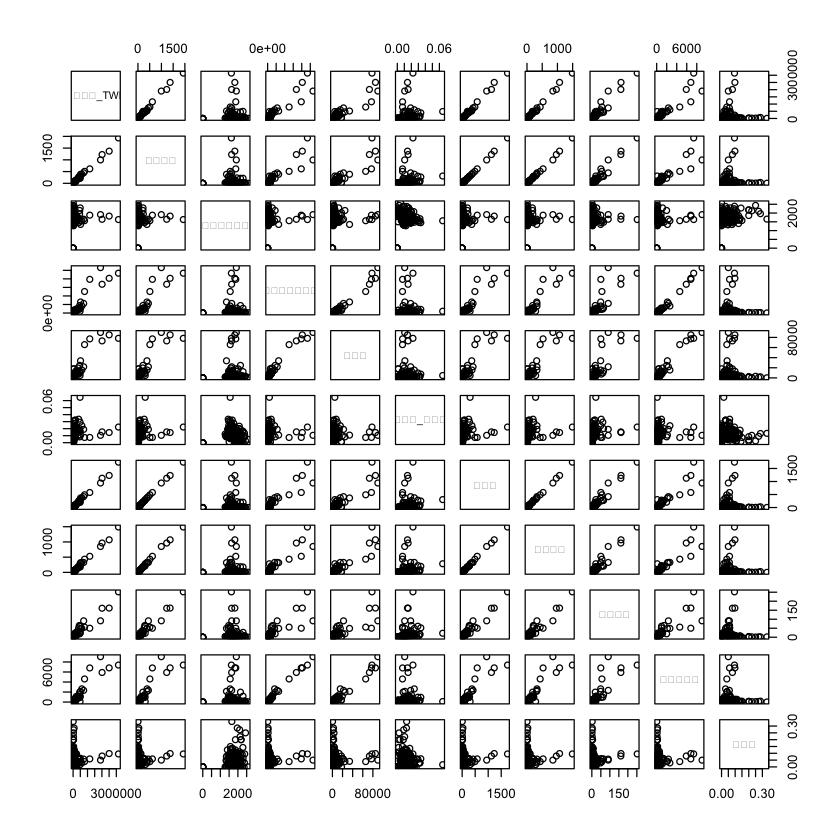

In [77]:
plot(shopeeflow)

In [56]:
colnames(shopeeflow)

[1] "總銷售額_TWD"          "訂單總數"              "平均訂單金額"         
 [4] "商品頁面瀏覽數"        "訪客數"                "訂單轉換率_可出貨訂單"
 [7] "買家數"                "新買家數"              "舊買家數"             
[10] "潛在買家數"            "回購率"

In [78]:
summary(shopeeflow)

  總銷售額_TWD        訂單總數        平均訂單金額  商品頁面瀏覽數  
 Min.   :      0   Min.   :   0.00   Min.   :   0   Min.   :   175  
 1st Qu.:  27132   1st Qu.:  16.25   1st Qu.:1605   1st Qu.:  5711  
 Median :  43664   Median :  25.00   Median :1729   Median :  7976  
 Mean   : 111605   Mean   :  65.22   Mean   :1713   Mean   : 20407  
 3rd Qu.:  70319   3rd Qu.:  38.75   3rd Qu.:1875   3rd Qu.: 11732  
 Max.   :3149804   Max.   :1933.00   Max.   :2584   Max.   :531711  
     訪客數      訂單轉換率_可出貨訂單     買家數           新買家數      
 Min.   :   94   Min.   :0.00000       Min.   :   0.00   Min.   :   0.00  
 1st Qu.: 1442   1st Qu.:0.00800       1st Qu.:  15.25   1st Qu.:  12.00  
 Median : 2159   Median :0.01135       Median :  24.00   Median :  20.00  
 Mean   : 4850   Mean   :0.01212       Mean   :  61.42   Mean   :  52.05  
 3rd Qu.: 3520   3rd Qu.:0.01578       3rd Qu.:  37.75   3rd Qu.:  32.00  
 Max.   :89783   Max.   :0.06470       Max.   :1743.00   Max.   :1491.00  
    舊買家數         潛在買家數         回購

### [問題]
1. 平均訂單金額 vs. 新買家＆舊買家：新買家越多會不會銷售額越多，還是銷售額和舊買家比較有關（參考回購率？）
2. 訪客數越多(or商品頁面瀏覽數)，新買家會越多嗎？總銷售額有變高嗎？平均訂單金額是多少？